In [12]:
#神经网络预测共享单车使用
#!wget http://labfile.oss.aliyuncs.com/courses/1073/bike-sharing-dataset.zip
#!unzip bike-sharing-dataset.zip

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
import torch.optim as optim
%matplotlib inline

In [14]:
data_path='bike-sharing-dataset/hour.csv'
rides=pd.read_csv(data_path)
rides.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [15]:
#对类型变量处理
dummy_fields=['season','weathersit','mnth','hr','weekday']
for each in dummy_fields:
    dummies=pd.get_dummies(rides[each],prefix=each,drop_first=0)
    rides=pd.concat([rides,dummies],axis=1)

#删除不需要的特征
fields_to_drop=['season','weathersit','mnth','hr','weekday','instant','dteday','atemp','workingday']
data=rides.drop(fields_to_drop,axis=1)
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,True,False,...,False,False,False,False,False,False,False,False,False,True
1,0,0,0.22,0.80,0.0,8,32,40,True,False,...,False,False,False,False,False,False,False,False,False,True
2,0,0,0.22,0.80,0.0,5,27,32,True,False,...,False,False,False,False,False,False,False,False,False,True
3,0,0,0.24,0.75,0.0,3,10,13,True,False,...,False,False,False,False,False,False,False,False,False,True
4,0,0,0.24,0.75,0.0,0,1,1,True,False,...,False,False,False,False,False,False,False,False,False,True


In [16]:
#标准化特征
quant_features=['cnt','temp','hum','windspeed']
scaled_features={}
for each in quant_features:
    mean,std=data[each].mean(),data[each].std()
    scaled_features[each]=[mean,std]
    data.loc[:,each]=(data[each]-mean)/std

In [17]:
#数据集分割
test_data=data[-21*24:]
train_data=data[:-21*24]
print('训练数据',len(test_data),'测试数据',len(train_data))
target_fields=['cnt','casual','registered']
features,targets=train_data.drop(target_fields,axis=1),train_data[target_fields]
test_features,test_targets=test_data.drop(target_fields,axis=1),test_data[target_fields]

#数据从pandas dataframe转换为numpy
X=features.values
Y=targets['cnt'].values
Y=Y.astype(float)

Y=np.reshape(Y,[len(Y),1])
losses=[]

features.head()
print(X)

训练数据 504 测试数据 16875
[[0 0 -1.3346091869412673 ... False False True]
 [0 0 -1.438475009903406 ... False False True]
 [0 0 -1.438475009903406 ... False False True]
 ...
 [1 0 0.11951233452867807 ... False False False]
 [1 0 -0.19208513435773875 ... False False False]
 [1 0 -0.19208513435773875 ... False False False]]


In [18]:
#手动搭建神经网络、
#定义神经网络架构，features. shape[1]个输入层单元，10个隐含层，1个输出层
input_size = features.shape[1] #输入层单元个数
hidden_size = 10 #隐含层单元个数
output_size = 1 #输出层单元个数
batch_size = 128 #每隔batch的记录数
weights1 = Variable(torch.randn([input_size, hidden_size]), requires_grad = True)#第一到二层权重
biases1 = Variable(torch.randn( [hidden_size]),requires_grad = True)#隐含层偏置
weights2 = Variable(torch.randn([hidden_size, output_size]), requires_grad = True)#隐含层到输出层权重
# def neu(x):
#     #计算隐层输出
#     #X:128*inputsize;weights1:inputsize*hiddensize=128*hidden=>sigmoid
#     hidden=x.mm(weights1)+biases1.expand(x.size()[0],hidden_size)
#     hidden=torch.sigmoid(hidden)

#     output=hidden.mm(weights2)
#     return output

def cost(x,y):
    return torch.mean((x-y)**2)

def zero_grad():
    if weights1.grad!=None and biases1.grad!=None and weights2.grad!=None:
        weights1.grad.zero_()
        weights2.grad.zero_()
        biases1.grad.zero_()

def optimizer_step(learning_rate):
    weights1.grad.add_(-learning_rate* weights1.grad.data)
    weights2.grad.add_(-learning_rate* weights2.grad.data)
    biases1.data.add_(-learning_rate* biases1.grad.data)



In [19]:
#3.2定义神经网络架构，features. shape[1]个输入层单元，10个隐含层，1个输出层
input_size = features.shape[1]
hidden_size = 10
output_size = 1
batch_size = 128
neu = torch. nn. Sequential(
    torch. nn.Linear(input_size,hidden_size),
    torch. nn.Sigmoid(),
    torch. nn.Linear(hidden_size,output_size),
    )
cost=torch.nn.MSELoss()
optimizer=torch.optim.SGD(neu.parameters(),lr=0.01)

In [20]:
#3.3数据分批次处理
#神经网络训练循环
losses=[]
for i in range(1000):
    batch_loss=[]
    for start in range(0,len(X),batch_size):
        end = start +batch_size if start+batch_size<len(X) else len(X)
        X=X.astype(float)
        xx=Variable(torch.FloatTensor((X[start:end])))
        yy=Variable(torch.FloatTensor(Y[start:end]))
        predict=neu(xx)
        loss=cost(predict,yy)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        batch_loss.append(loss.data.numpy())
    
    if i%100==0:
        losses.append(np.mean(batch_loss))
        print(i,np.mean(batch_loss))
    

0 0.9075402
100 0.27027863
200 0.2262065
300 0.14788076
400 0.09620182
500 0.07708397
600 0.07039443
700 0.067039385
800 0.064887576
900 0.06332913


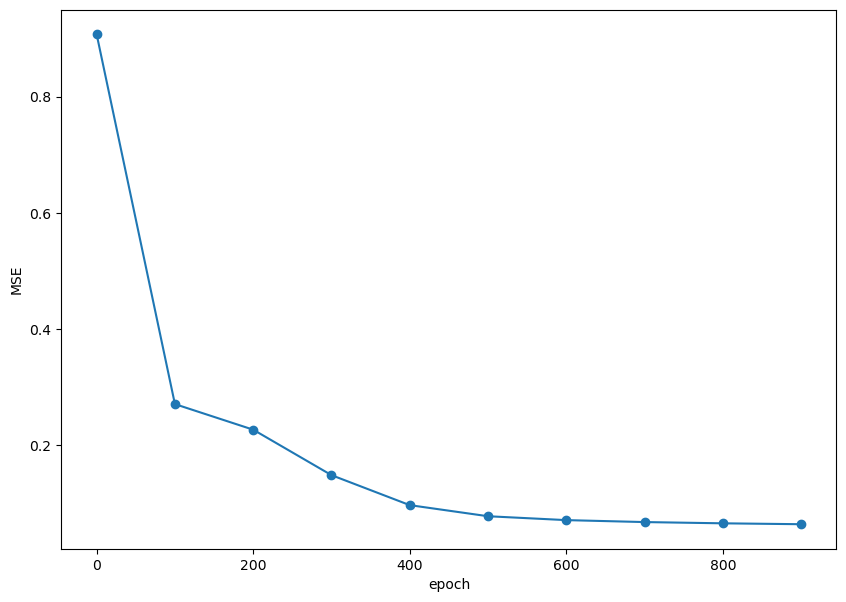

In [22]:
fig = plt.figure(figsize=(10,7))
plt.plot(np.arange(len(losses))*100,losses,'o-')
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.show()

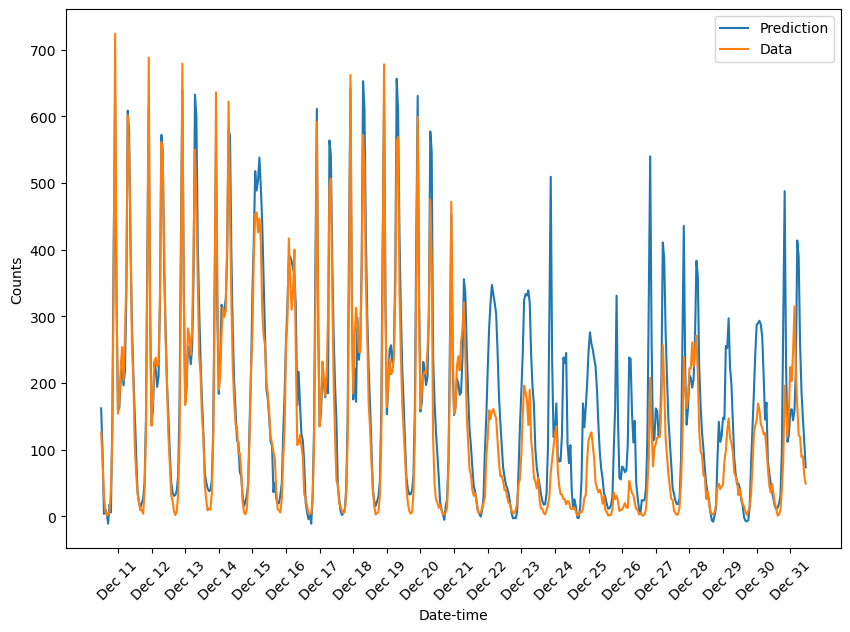

In [23]:
#4.1测试数据测试
targets=test_targets['cnt']#读取测试集的cnt数值
targets=targets.values.reshape([len(targets),1])#将数据转换成合适的tensor形
targets=targets.astype(float)#保证数据为实数
#将属性和预测变量包裹在ariab1e型变量中
x=Variable(torch.FloatTensor(test_features.values.astype(float)))
y=Variable(torch.FloatTensor(targets))
#用神经网络进行预测
predict=neu(x)
predict=predict.data.numpy()
fig,ax=plt.subplots(figsize=(10,7))
mean,std=scaled_features['cnt']
ax.plot(predict * std+mean,label='Prediction',linestyle ='-')
ax.plot(targets * std+mean,label='Data',linestyle ='-')
ax.legend()
ax.set_xlabel('Date-time')
ax.set_ylabel('Counts')
#对横坐标轴进行标注
dates=pd.to_datetime(rides.loc[test_data.index]['dteday'])
dates=dates.apply(lambda d:d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_=ax.set_xticklabels(dates[12::24],rotation=45)